In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nums = np.arange(start= 1, stop=4096)
nums

array([   1,    2,    3, ..., 4093, 4094, 4095])

In [ ]:
# db = 10*log(P1/P2)

s = 10*np.log10(nums/64)
print(np.min(s))
print(np.max(s))

t = 0 + ((s - np.min(s))*(4095-0))/(np.max(s)-np.min(s))

t = t.round().astype(np.int)
t

-18.06179973983887
18.0607393211255


<ipython-input-3-ba0007b49c0d>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = t.round().astype(np.int)


array([   0,  341,  541, ..., 4095, 4095, 4095])

In [ ]:
string = ''
for i, k in zip(nums,t):
  string += f"if(in < {i}) begin \n\tout = {k}; \n\tend\n"

In [ ]:
text_file = open("sample.txt", "w")
n = text_file.write(string)
text_file.close()

# Filtros


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal

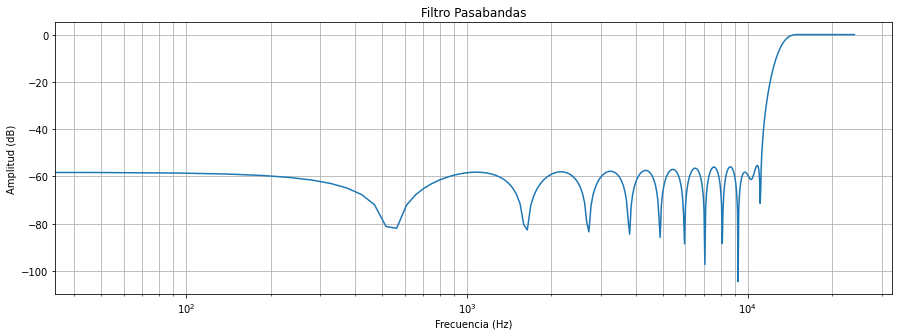

In [78]:
taps = 45
fs= 48e3 #Hz
co = 13e3
h= signal.firwin(numtaps= taps, cutoff= co, window= 'hamming', pass_zero= 'highpass', fs= fs)

w,H = signal.freqz(h)
freqs = w*fs/(2*np.pi)


plt.figure(figsize= (15,5))
plt.semilogx(freqs ,20 * np.log10(abs(H)))
plt.title('Filtro Pasabandas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.grid(which= 'both')
plt.show()

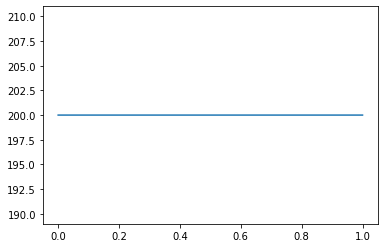

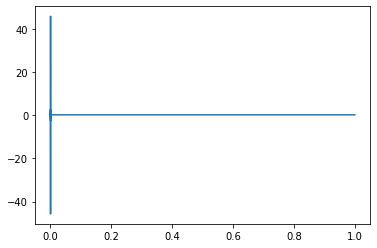

In [79]:
t = np.linspace(start=0,stop=1,num=50000)
f = 200
x = np.full(50000,200)
#x = np.sin(2*np.pi*f*t)
#noise = np.random.normal(0,1e-2,len(x))
#x = x + noise
plt.plot(t,x)
plt.show()
z = signal.lfilter(h,1,x)
plt.plot(t,z)
plt.show()

In [80]:
np.max(np.abs(h))

0.4587461445730678

In [81]:
coefs_bits = 8
s = h/np.max(np.abs(h)) * 2**(coefs_bits-1)-1
2**(coefs_bits-1)

128

In [82]:
coefs = np.rint(s)
coefs

array([ -1.,  -1.,  -1.,  -1.,  -0.,  -0.,  -2.,  -2.,   1.,  -1.,  -5.,
        -0.,   4.,  -4.,  -8.,   5.,   8., -14., -11.,  25.,  10., -89.,
       127., -89.,  10.,  25., -11., -14.,   8.,   5.,  -8.,  -4.,   4.,
        -0.,  -5.,  -1.,   1.,  -2.,  -2.,  -0.,  -0.,  -1.,  -1.,  -1.,
        -1.])

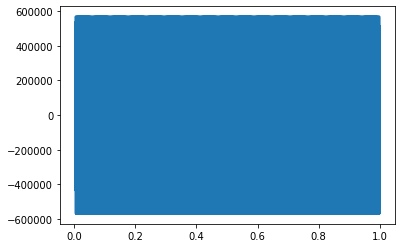

In [85]:
ff= 17e3

sig = 2047*  np.sin(2*np.pi*ff*t)
#noise = np.random.normal(0,1,len(sig))
#sig += noise
sig = np.rint(sig)
#sig = np.full(len(t),2048)
z = signal.lfilter(coefs,1,sig)
plt.plot(t[200:],z[200:])
plt.show()

In [86]:
1/(1/np.max(np.abs(z)) * 2047)

282.1675622862726

# Creacion del VHDL


In [42]:
filter_basic = open("FIR_TEMPLATE.vhd",'r')
txt = filter_basic.readlines()
filter_basic.close()

In [43]:
c = 0
for i, line in enumerate(txt):
  if 'REPLACE_ME' in line:
    txt[i] = txt[i].replace('REPLACE_ME', str(int(coefs[c])))
    c += 1

In [44]:
res = " ".join([str(item) for item in txt])
out = open("FIR_HIGHPASS.vhd", "w")
n = out.write(res)
out.close()